<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    Import Data
</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Loading Train Data
df = pd.read_csv('DailyDelhiClimateTrain.csv')
data = df[['date', 'meantemp']]
data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index)

FileNotFoundError: [Errno 2] No such file or directory: 'DailyDelhiClimateTrain.csv'

In [3]:
data.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    Visualize the Data
</h2>

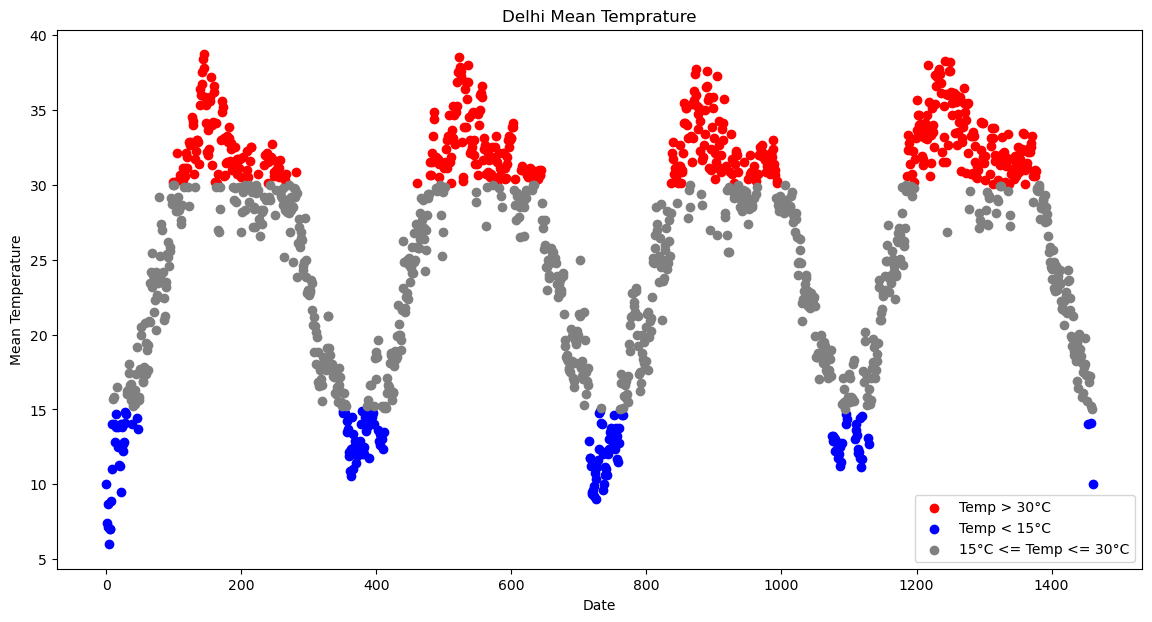

In [4]:
# Separate the temperatures into two categories for coloring
high_temp = df[df['meantemp'] > 30]
low_temp = df[df['meantemp'] < 15]
medium_temp = df[(df['meantemp'] <= 30) & (df['meantemp'] >= 15)]

# Plotting
plt.figure(figsize=(14, 7))

# Scatter plot with different colors
plt.scatter(high_temp.index, high_temp['meantemp'], color='red', label='Temp > 30°C')
plt.scatter(low_temp.index, low_temp['meantemp'], color='blue', label='Temp < 15°C')
plt.scatter(medium_temp.index, medium_temp['meantemp'], color='gray', label='15°C <= Temp <= 30°C')

plt.title('Delhi Mean Temprature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    Stationarity Check (ADF test)
</h2>

In [5]:
def check_stationarity(timeseries): 
    # Perform the Dickey-Fuller test 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1] 
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print('Stationary' if p_value < 0.05 else 'Non-Stationary') 
    
# Check stationarity of the original data
check_stationarity(data)

ADF Statistic: -2.0210690559206728
p-value: 0.27741213723016056
Non-Stationary


#### Converting Non-Stationary to Stationary using logarithm as there is yearly seasonality

In [6]:
data['log_meantemp'] = np.log(data['meantemp'])
check_stationarity(data['log_meantemp'])

ADF Statistic: -3.5865118809043945
p-value: 0.006024189473988412
Stationary


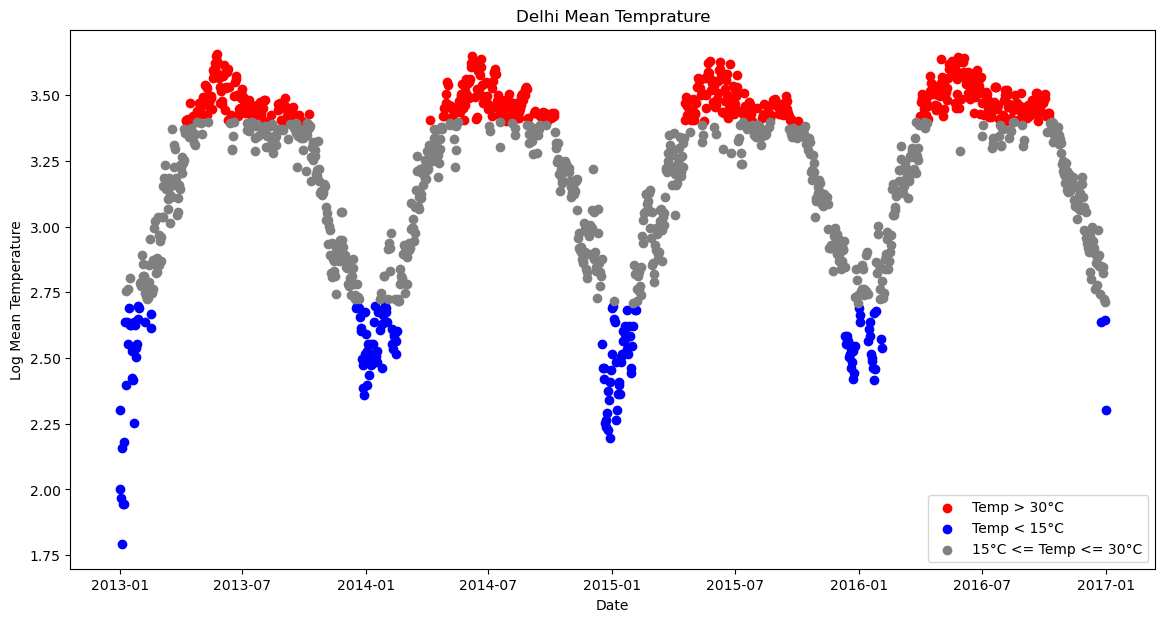

In [7]:
# Separate the temperatures into two categories for coloring
high_temp = data[data['log_meantemp'] > 3.4]
low_temp = data[data['log_meantemp'] < 2.7]
medium_temp = data[(data['log_meantemp'] <= 3.4) & (data['log_meantemp'] >= 2.7)]

# Plotting
plt.figure(figsize=(14, 7))

# Scatter plot with different colors
plt.scatter(high_temp.index, high_temp['log_meantemp'], color='red', label='Temp > 30°C')
plt.scatter(low_temp.index, low_temp['log_meantemp'], color='blue', label='Temp < 15°C')
plt.scatter(medium_temp.index, medium_temp['log_meantemp'], color='gray', label='15°C <= Temp <= 30°C')

plt.title('Delhi Mean Temprature')
plt.xlabel('Date')
plt.ylabel('Log Mean Temperature')
plt.legend()
plt.show()

<p style="color:blue;">ACF Test and Data Visualization shows its a non stationary and multiplicative Time Series Dataset</p>

<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    ACF Test
</h2>

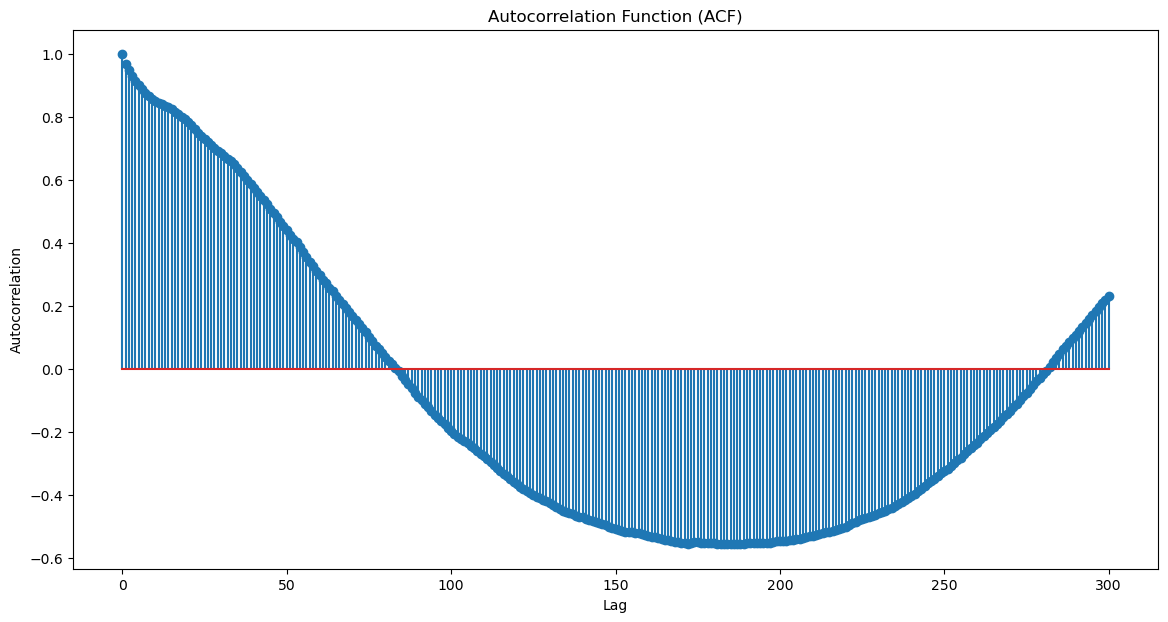

In [8]:
# Calculate the Autocorrelation Function (ACF)
autocorr = sm.tsa.stattools.acf(data['log_meantemp'], nlags=300)
plt.figure(figsize=(14, 7))
plt.stem(range(len(autocorr)), autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<p style="color:blue;">ACF Test and Data Visualization shows its a non stationary and multiplicative Time Series Dataset</p>

<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    PACF Test
</h2>

In [9]:
data

,meantemp,log_meantemp
date,,
2013-01-01,10.000000,2.302585
2013-01-02,7.400000,2.001480
2013-01-03,7.166667,1.969441
2013-01-04,8.666667,2.159484
2013-01-05,6.000000,1.791759
...,...,...
2016-12-28,17.217391,2.845920
2016-12-29,15.238095,2.723799
2016-12-30,14.095238,2.645837


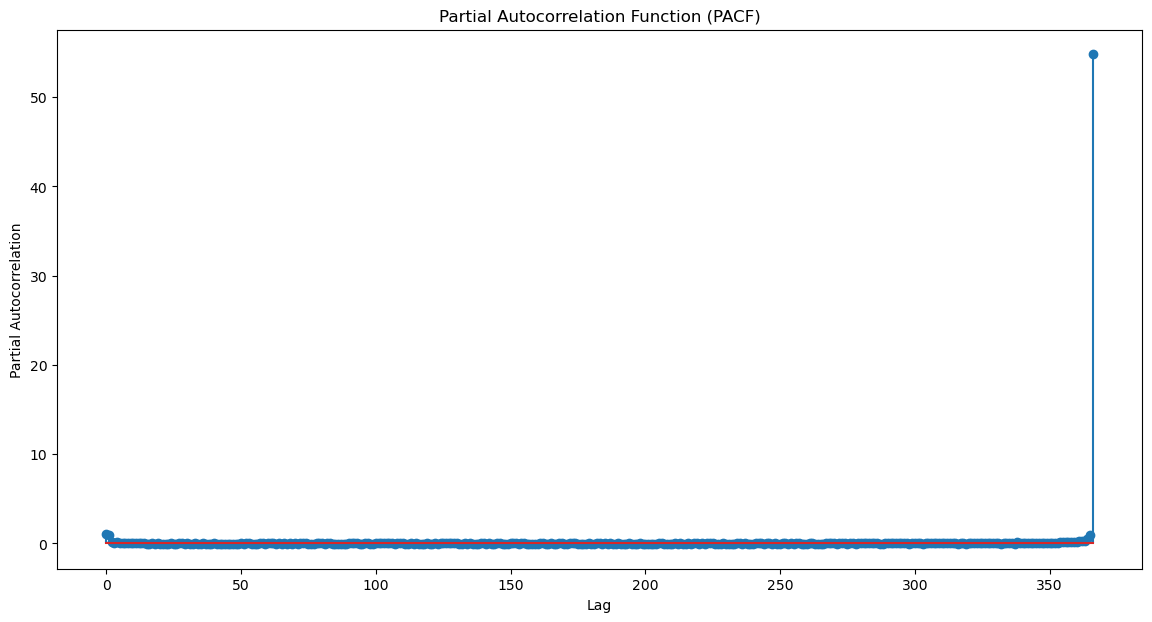

In [10]:
# Calculate the Partial Autocorrelation Function (PACF)
partial_autocorr = sm.tsa.stattools.pacf(data['log_meantemp'], nlags=366)
plt.figure(figsize=(14, 7))
plt.stem(range(len(partial_autocorr)), partial_autocorr)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

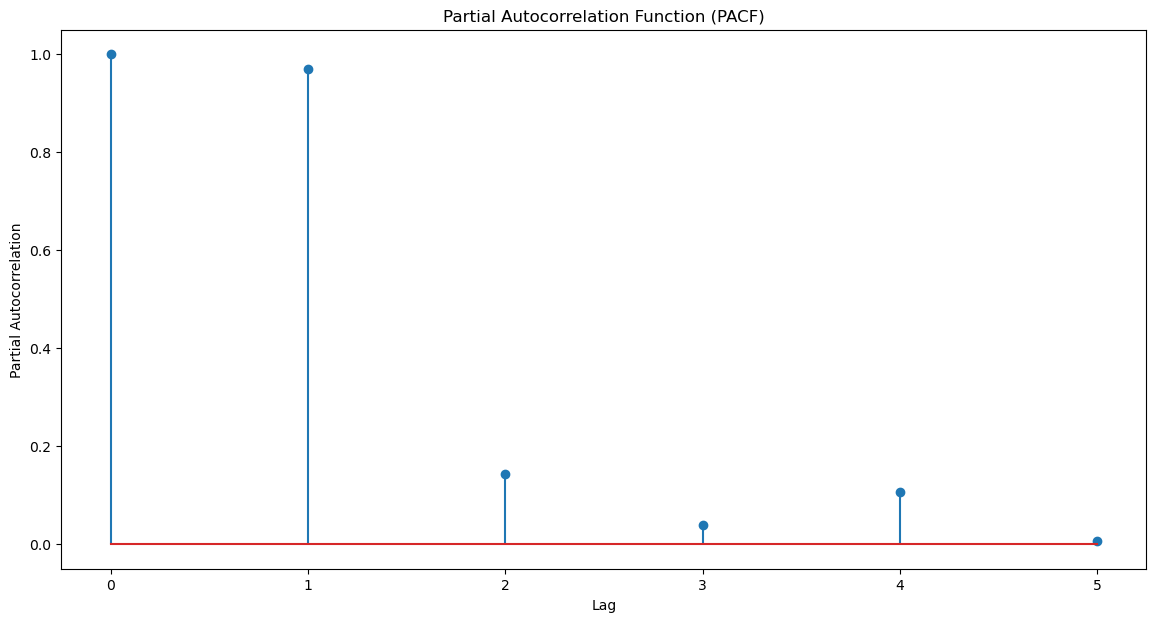

In [27]:
# Calculate the Partial Autocorrelation Function (PACF)
partial_autocorr = sm.tsa.stattools.pacf(data['log_meantemp'], nlags=5)
plt.figure(figsize=(14, 7))
plt.stem(range(len(partial_autocorr)), partial_autocorr)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

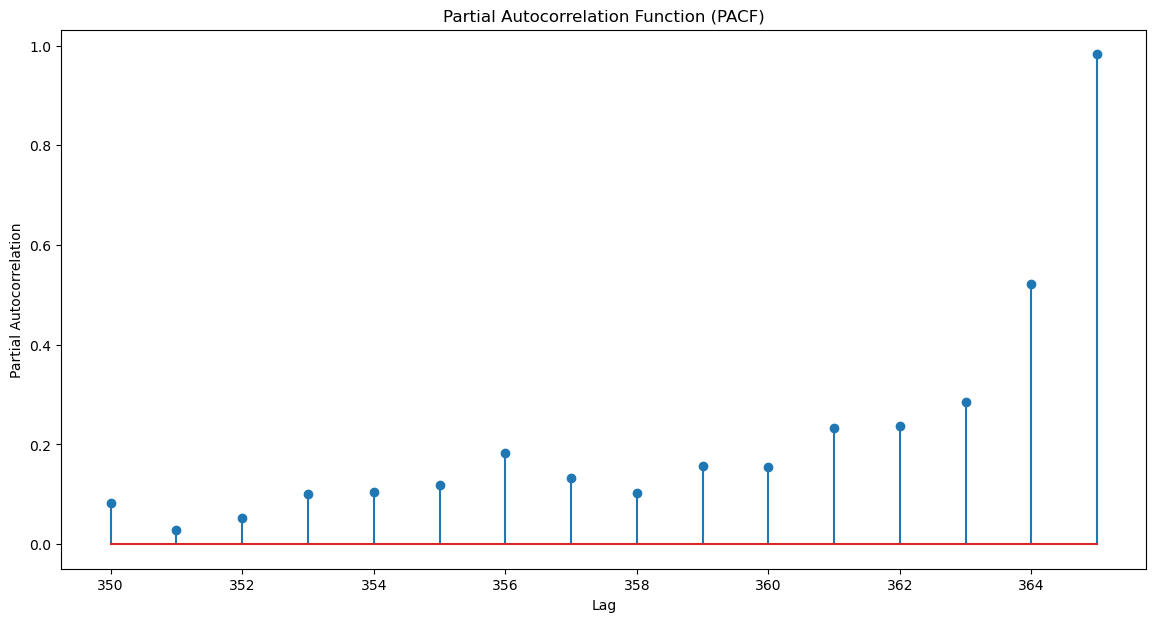

In [31]:
# Calculate the Partial Autocorrelation Function (PACF)
partial_autocorr = sm.tsa.stattools.pacf(data['log_meantemp'], nlags=367)

plt.figure(figsize=(14, 7))
plt.stem(range(350,366), partial_autocorr[350:366])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

#### Parameters
- d = 0
- S = 1, 365, 366

<h2 style="background-color: #000; color: #fff; font-family: Arial, sans-serif; padding: 10px; border-radius: 5px;">
    Decomposition of Dataset
</h2>

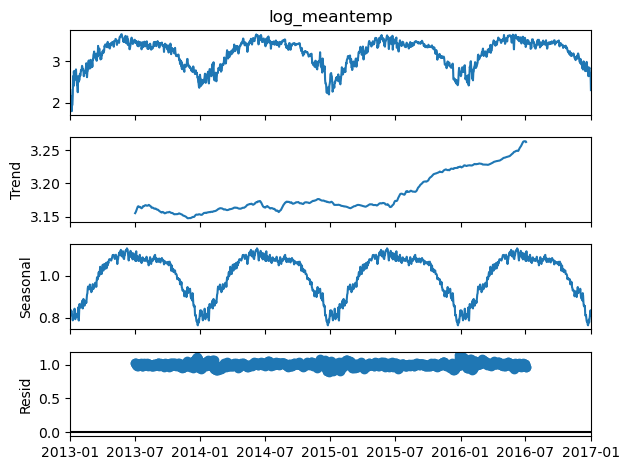

In [11]:
# Decompose the data to verify seasonality
decomposition = sm.tsa.seasonal_decompose(data['log_meantemp'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

<p style="color:blue;">Above Graphs shows a higher correlation after every 350-380 Lag. i.e. there is Annual Seasonality in this time series data.</p>